# Objective
- to develop a regression model that predicts pc prices
- There are many shops that might scam people of pc prices as the price of pc is not easy to understand
- Hence, this model hopes to predict the price of a pc based on its specs so that intrested buyers so that they know what price range to search for according to the specs that they use
- This model must make as little error as possible as it might cause buyers to make wrong decision

In [1]:
import phik
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
rng = np.random.RandomState(1)


In [2]:
data = pd.read_csv("pc_data (regression).csv")
data

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200
15316,15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600
15317,15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.82600
15318,15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600


Check for missing values

In [3]:
data.isnull().sum()

Product ID          0
Brand               0
Type                0
Screen Size         0
Screen Specs        0
CPU                 0
RAM                 0
Hard Disk           0
GPU                 0
Operating System    0
Weight              0
Price ($)           0
dtype: int64

No missing values :)

In [4]:
for col in data.columns:
    print('Unique', col , 'Values')
    print( data[col].unique() )
    print(col , 'has' , data[col].nunique() , 'unique values')
    print()

Unique Product ID Values
[    0     1     2 ... 15317 15318 15319]
Product ID has 15320 unique values

Unique Brand Values
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Brand has 19 unique values

Unique Type Values
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Type has 6 unique values

Unique Screen Size Values
[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
Screen Size has 18 unique values

Unique Screen Specs Values
['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscree

1. Need to clean `CPU` info (extract the brand and model)
2. Remove the 'GB' from the `RAM`
3. Remove the KG from the `Weight`
4. Need to custom one hot encode the hard drive info into columns `SSD` , `HDD` , `Flash Drive` , `Hybrid` as each type of `Hard Drive` have different cost for the same amount of storage
5. Extract the width and height from screen size (larger screens should be more expensive)

A computer with 256GB SSD and 512GB HDD would be represented by: 

|SSD| HDD | hybrid| Flash Drive
:-------------------|:---------------|:---------------|:---------------
256 |512 |0  |0




In [5]:
data.drop(columns = ['Product ID'] , inplace =True)
data['RAM'] = data.RAM.str.replace('GB','').astype(int) 
data['Weight'] = data['Weight'].str.replace('kg'  ,'').astype(float)


In [6]:
d = {'SSD' : [] , 'HDD' : [] , 'Flash': [] , 'Hybrid'  : []}


def appendtod(harddiskname):
    amount,kind =  harddiskname.split(' ')
   # print('kind have' , kind)
    d[kind].append(int(amount.replace('GB' ,'')))
    
def cleanfunc(harddiskname):
    
    if harddiskname is None:
        return 0
    
    
    if '+' in harddiskname:
        drives = list( map(lambda x : x.strip() , harddiskname.split("+") ))
    else:
        drives = [harddiskname]
        
    
    if len(drives) != 1 and  drives[0].split(' ')[1] == drives[1].split(" ")[1]:
        amount1,kind =  drives[0].split(' ')
        amount2,_ = drives[1].split(' ')
        d[kind].append(int(amount1.replace('GB' ,'')) + int(amount2.replace('GB' , '')))
         
    else:
        for drive in drives:
            amount,kind =  drive.split(' ')
            d[kind].append(int(amount.replace('GB' ,'')))


    
    
    drives  = list(map(lambda x : x.split(' ')[1] , drives))

    for key in filter(lambda x: x  not in drives,  d.keys()):

        d[key].append(0)
   
        

data['Hard Disk'].str.replace('.0','' , regex = False).str.replace('TB' , '000GB').str.replace(' Storage' , '').apply(cleanfunc)[0]
hardisk = pd.DataFrame(d)
display( hardisk)
data = pd.concat((data,hardisk) , axis = 1)

,SSD,HDD,Flash,Hybrid
0,128,0,0,0
1,0,0,128,0
2,256,0,0,0
3,512,0,0,0
4,256,0,0,0
...,...,...,...,...
15315,128,0,0,0
15316,512,0,0,0
15317,0,0,64,0
15318,0,1000,0,0


In [7]:
data.drop(columns = ['Hard Disk'] , inplace = True)

data

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,GPU,Operating System,Weight,Price ($),SSD,HDD,Flash,Hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,3568.93416,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,2394.77616,0,0,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,1531.80000,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,6759.76680,512,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,4804.79040,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,1706.40200,128,0,0,0
15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,4000.10600,512,0,0,0
15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,616.82600,0,0,64,0
15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,2042.06600,0,1000,0,0


In [8]:
# #data['Intel i Series Generation'] = 
# s= data.CPU.str.extract('Intel Core i\d (\d)',expand = False)#.str.replace('1|2' , )
# s[(s== '2') | (s=='1')  | (s=='3')] = np.nan
# data['Intel i Series Generation'] = s


In [9]:
data['CPU Brand'] = data.CPU.apply(lambda x : x.split(" ")[0])

data['CPU Sub Categories'] = data.CPU.str.extract('(Intel Core i\d|AMD \w+|Intel \w+|Samsung Cortex A72&A53 2.0GHz)',expand = False)


data['Clock Speed'] = data.CPU.apply(lambda x : x.split(' ')[-1].replace('GHz', '')).astype(float) 


for i in ['CPU Brand' , 'CPU Sub Categories' , 'Clock Speed']:
    print("Unique values for " , i )
    display(data[i].unique() )
    print()

Unique values for  CPU Brand


array(['Intel', 'AMD', 'Samsung'], dtype=object)


Unique values for  CPU Sub Categories


array(['Intel Core i5', 'Intel Core i7', 'AMD A9', 'Intel Core i3',
       'Intel Core', 'Intel Atom', 'AMD E', 'AMD A6', 'Intel Celeron',
       'AMD Ryzen', 'Intel Pentium', 'AMD FX', 'Intel Xeon', 'AMD A10',
       'AMD A8', 'AMD A12', 'AMD A4', 'Samsung Cortex A72&A53 2.0GHz'],
      dtype=object)


Unique values for  Clock Speed


array([2.3 , 1.8 , 2.5 , 2.7 , 3.1 , 3.  , 2.2 , 1.6 , 2.  , 2.8 , 1.2 ,
       2.9 , 2.4 , 1.44, 1.5 , 1.9 , 1.1 , 1.3 , 2.6 , 3.6 , 3.2 , 1.  ,
       2.1 , 0.9 , 1.92])

In [10]:
data['IPS'] = data['Screen Specs'].str.contains('IPS' , regex = False).astype(int)
data['Touchscreen'] = data['Screen Specs'].str.contains('Touchscreen' , regex = False).astype(int)
data[['Length' , 'Width']] =  data['Screen Specs'].str.extract('(\d+)[x](\d+)').astype(int)
data

,Brand,Type,Screen Size,Screen Specs,CPU,RAM,GPU,Operating System,Weight,Price ($),...,HDD,Flash,Hybrid,CPU Brand,CPU Sub Categories,Clock Speed,IPS,Touchscreen,Length,Width
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,3568.93416,...,0,0,0,Intel,Intel Core i5,2.3,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,2394.77616,...,0,128,0,Intel,Intel Core i5,1.8,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,1531.80000,...,0,0,0,Intel,Intel Core i5,2.5,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,6759.76680,...,0,0,0,Intel,Intel Core i7,2.7,1,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,4804.79040,...,0,0,0,Intel,Intel Core i5,3.1,1,0,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,1706.40200,...,0,0,0,Intel,Intel Core i7,2.5,1,1,1920,1080
15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,4000.10600,...,0,0,0,Intel,Intel Core i7,2.5,1,1,3200,1800
15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,616.82600,...,0,64,0,Intel,Intel Celeron,1.6,0,0,1366,768
15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,2042.06600,...,1000,0,0,Intel,Intel Core i7,2.5,0,0,1366,768


In [11]:
data['GPU type'] = np.array(list(map(lambda d: " ".join(d.split()[0:2]), data['GPU'])))
print("GPU type unique values")
data['GPU type'].unique() 

GPU type unique values


array(['Intel Iris', 'Intel HD', 'AMD Radeon', 'Nvidia GeForce',
       'Intel UHD', 'AMD R4', 'Nvidia GTX', 'AMD R17M-M1-70',
       'Nvidia Quadro', 'AMD FirePro', 'Intel Graphics', 'ARM Mali'],
      dtype=object)

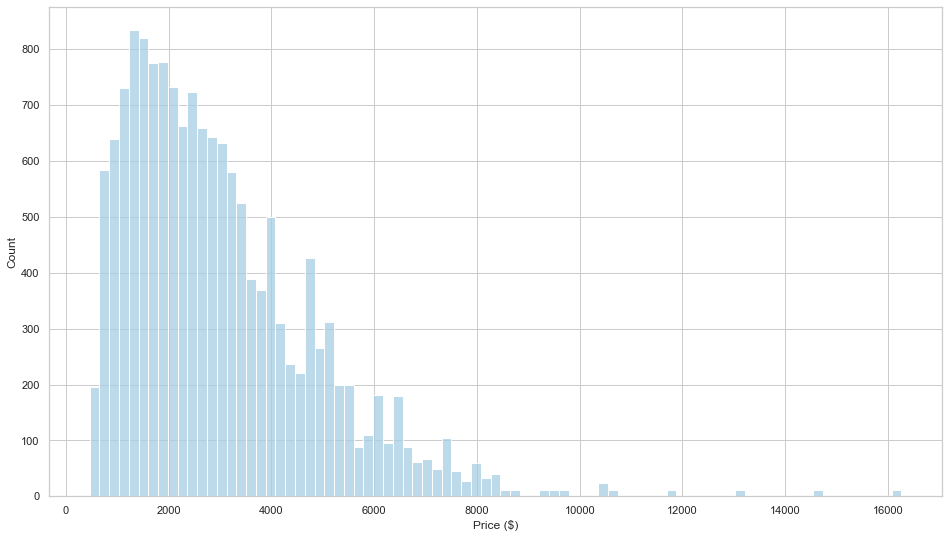

In [63]:
plt.figure(figsize = (16,9))
sns.histplot( x = 'Price ($)' , data = data)
plt.show() 

- Price follows a very positively skwed distribution
- Most computers have prices less than \\$4000 
- outliers like \\$16000 computers and other computers more than \\$10000 exist 
- These are computers that are very high in spec
- The `sklearn.compose.TransformedTargetRegressor` can be used to log tranform the column in order for the predictions to be more accurate

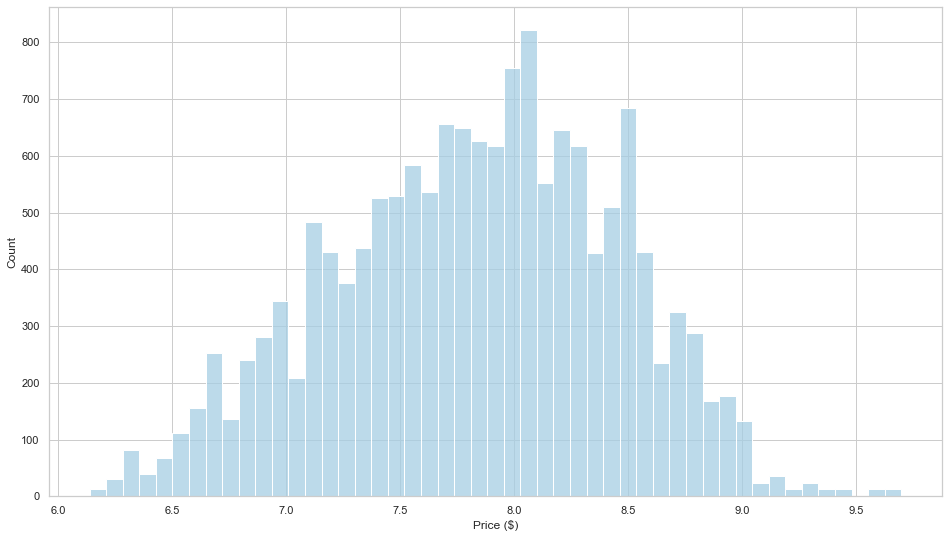

In [66]:
plt.figure(figsize = (16,9))
sns.histplot( x = np.log(data['Price ($)'] ))
plt.show() 

- The distribution looks more gaussian after log transform, which might make it easier for model to predict

interval columns not set, guessing: ['Screen Size', 'RAM', 'Weight', 'Price ($)', 'SSD', 'HDD', 'Flash', 'Hybrid', 'Clock Speed', 'IPS', 'Touchscreen', 'Length', 'Width']


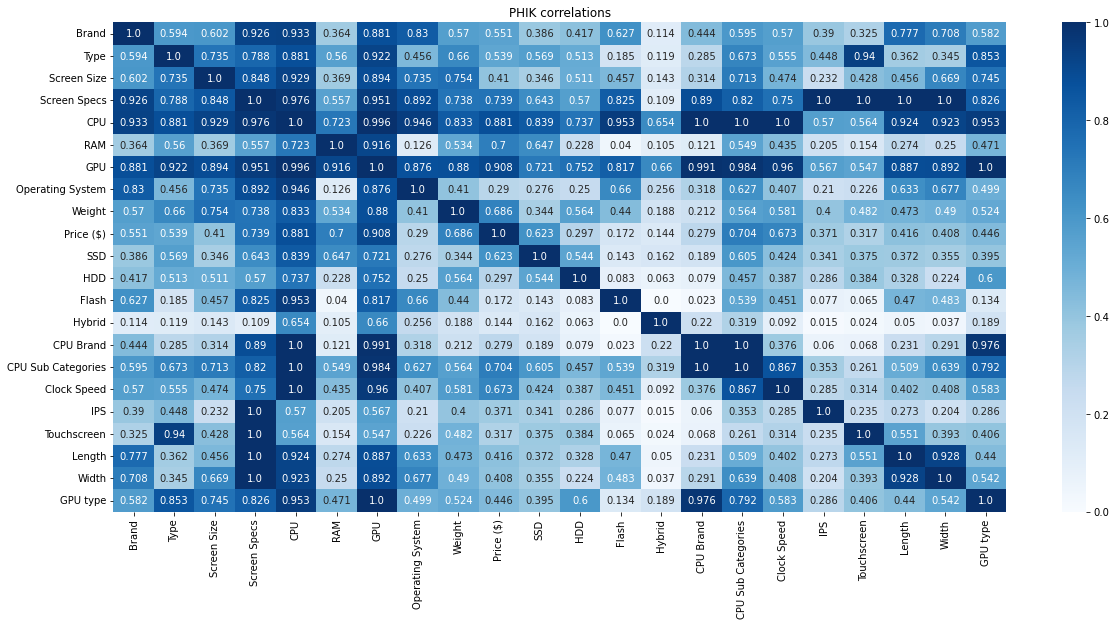

In [12]:
plt.figure( figsize = ( 20,9))
plt.title( 'PHIK correlations')
corr = np.round(data.phik_matrix() , 3  ) 
sns.heatmap(corr, fmt = ''  , cmap="Blues"  , annot = corr)


plt.show()


interval columns not set, guessing: ['Screen Size', 'RAM', 'Weight', 'Price ($)', 'SSD', 'HDD', 'Flash', 'Hybrid', 'Clock Speed', 'IPS', 'Touchscreen', 'Length', 'Width']


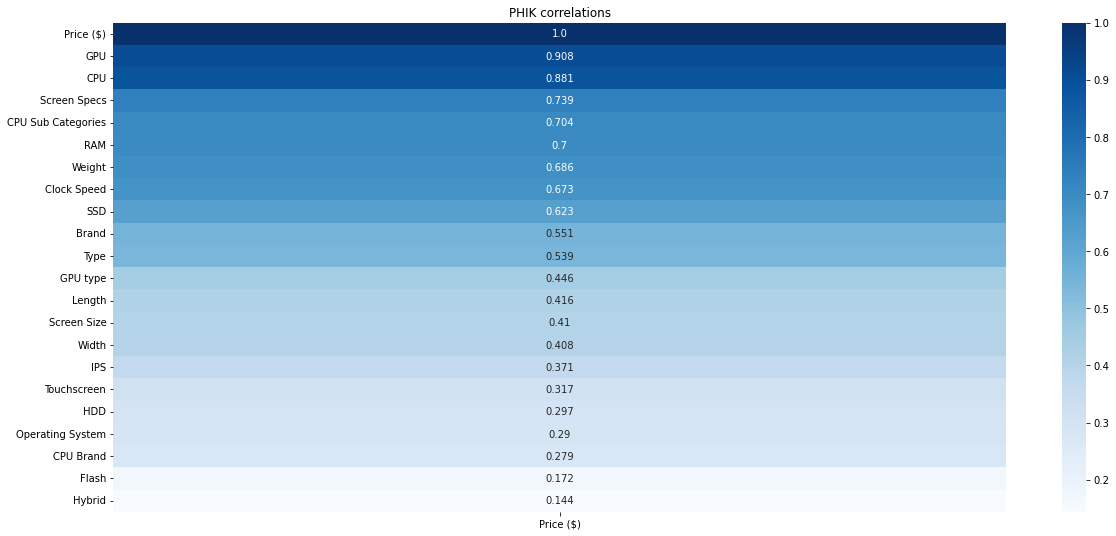

In [13]:
plt.figure( figsize = ( 20,9))
plt.title( 'PHIK correlations')
corrwithprice = np.round(data.phik_matrix()['Price ($)'].sort_values(ascending = False), 3  ).T
sns.heatmap(corrwithprice.to_frame() , fmt = ''  , cmap="Blues"  , annot = corrwithprice.to_frame() )


plt.show()


- There are a lot of redundant features here as a lot of the featueres are highly correlated with each other. For e.g between CPU and GPU 
- Manually removing the features might affect the performance of model 
- Consider to use RFE or PCA to remove the highly correlated features during modelling

Correlation with price:
- Strongest correlation is between Price and CPU and GPU at 0.881 and 0.908 respectively
- Generally, hardware specs that affect the pc speed influences the price more (Such as GPU CPU ,  RAM , and clock speed )
- None of the features have no correlation between itself and price 
- Lowest Correlation is Hybrid with 0.144, this is due to only a few computers have Hybrid Drives. This feature with the HDD, Flash , HDD and SSD help to predict the price in the model. Hence should not be dropped

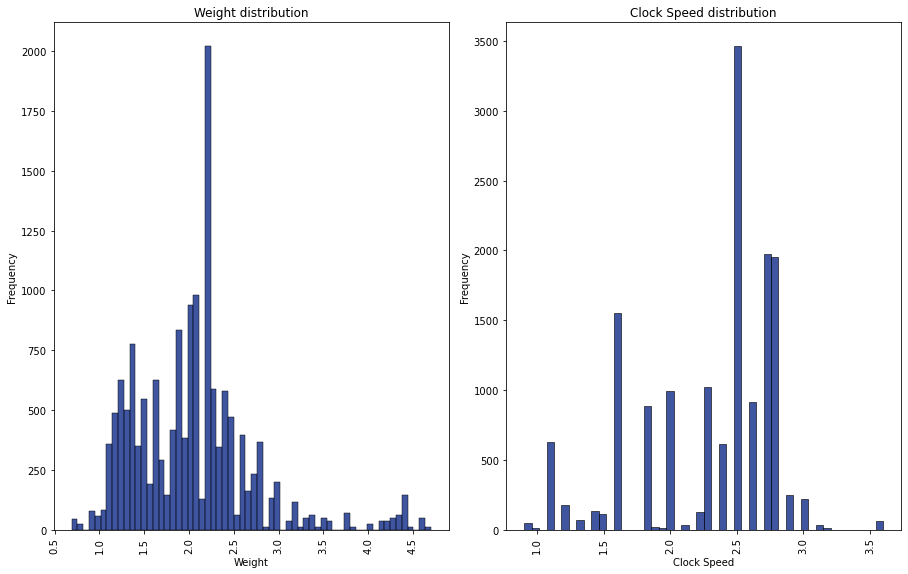

In [14]:
plt.figure(figsize=(19,23))
concol = [  'Weight'  , 'Clock Speed']
for i, col in enumerate(concol):

    sns.set_palette(sns.color_palette("dark"))
    ax = plt.subplot(3,3,i+1)
    ax.set_title(col + ' distribution')
   # temp = data.groupby(col)['Price ($)'].mean().sort_values(ascending = False)
    sns.histplot(x=col , data = data )
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Generally , These configurations are most common 
- Weight of around 2.4KG 
- 2.5GHz 

These are the specifications of a 'Typical' computer, Hence, the model is expected to do well on them as there are a lot of these kind of computers in the dataset. 

##### Presence of Outliers
- Some Outliers for weight  (weight  > 4.5) 
- clock speed (clock speed > 3.5)
- Shows that Robust Scaler should be used for models that require scaling.

##

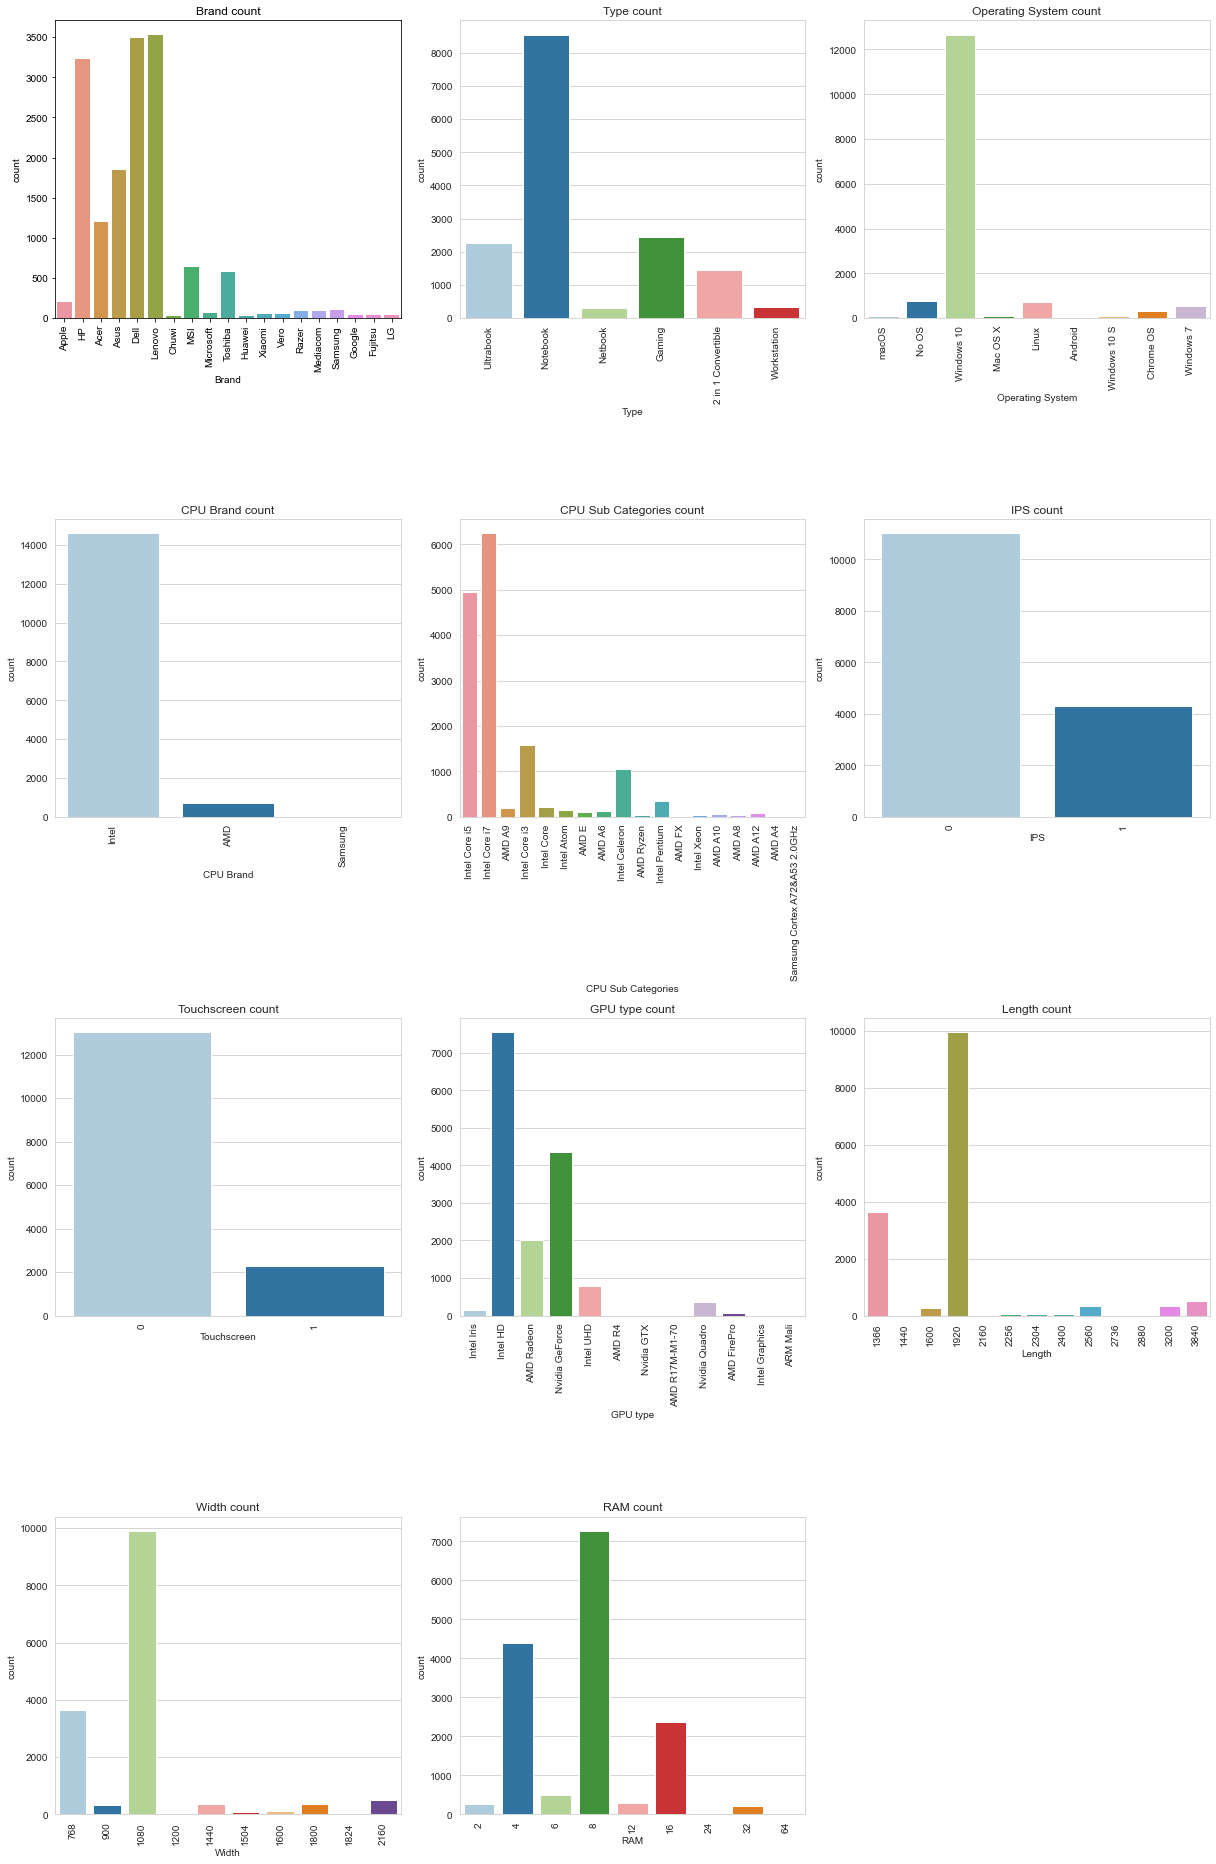

In [15]:
cat_col = ['Brand', 'Type', 'Operating System', 'CPU Brand','CPU Sub Categories', 'IPS' , 'Touchscreen'  ,'GPU type' ,'Length', 'Width' , 'RAM' ]
plt.figure(figsize=(17,26))

for i, col in enumerate(cat_col):

    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(4,3,i+1)
    ax.set_title(col + ' count')
    temp = data.groupby(col)['Price ($)'].mean().sort_values(ascending = False)
    
    sns.countplot(x= col, data = data )
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("count")
plt.tight_layout()
plt.show()

##### Most common for each feature is:
- Brand : HP , Asus , Dell , Lenovo
- Type : Notebook
- OS : Windows 10 (other OS a lot more rare)
- CPU Brand : Intel  (Other brands more rare)
- CPU Subtype : i5 and i7
- Screen : 1920 x 1080 no IPS and no Touchscreen
- GPU type : Intel HD and Nvidia Ge Force
- RAM : 8GB 

These specs above are very common. 
The model should perform well on these common specs but might struggle for computers with higher specs (as they are rarer) . 

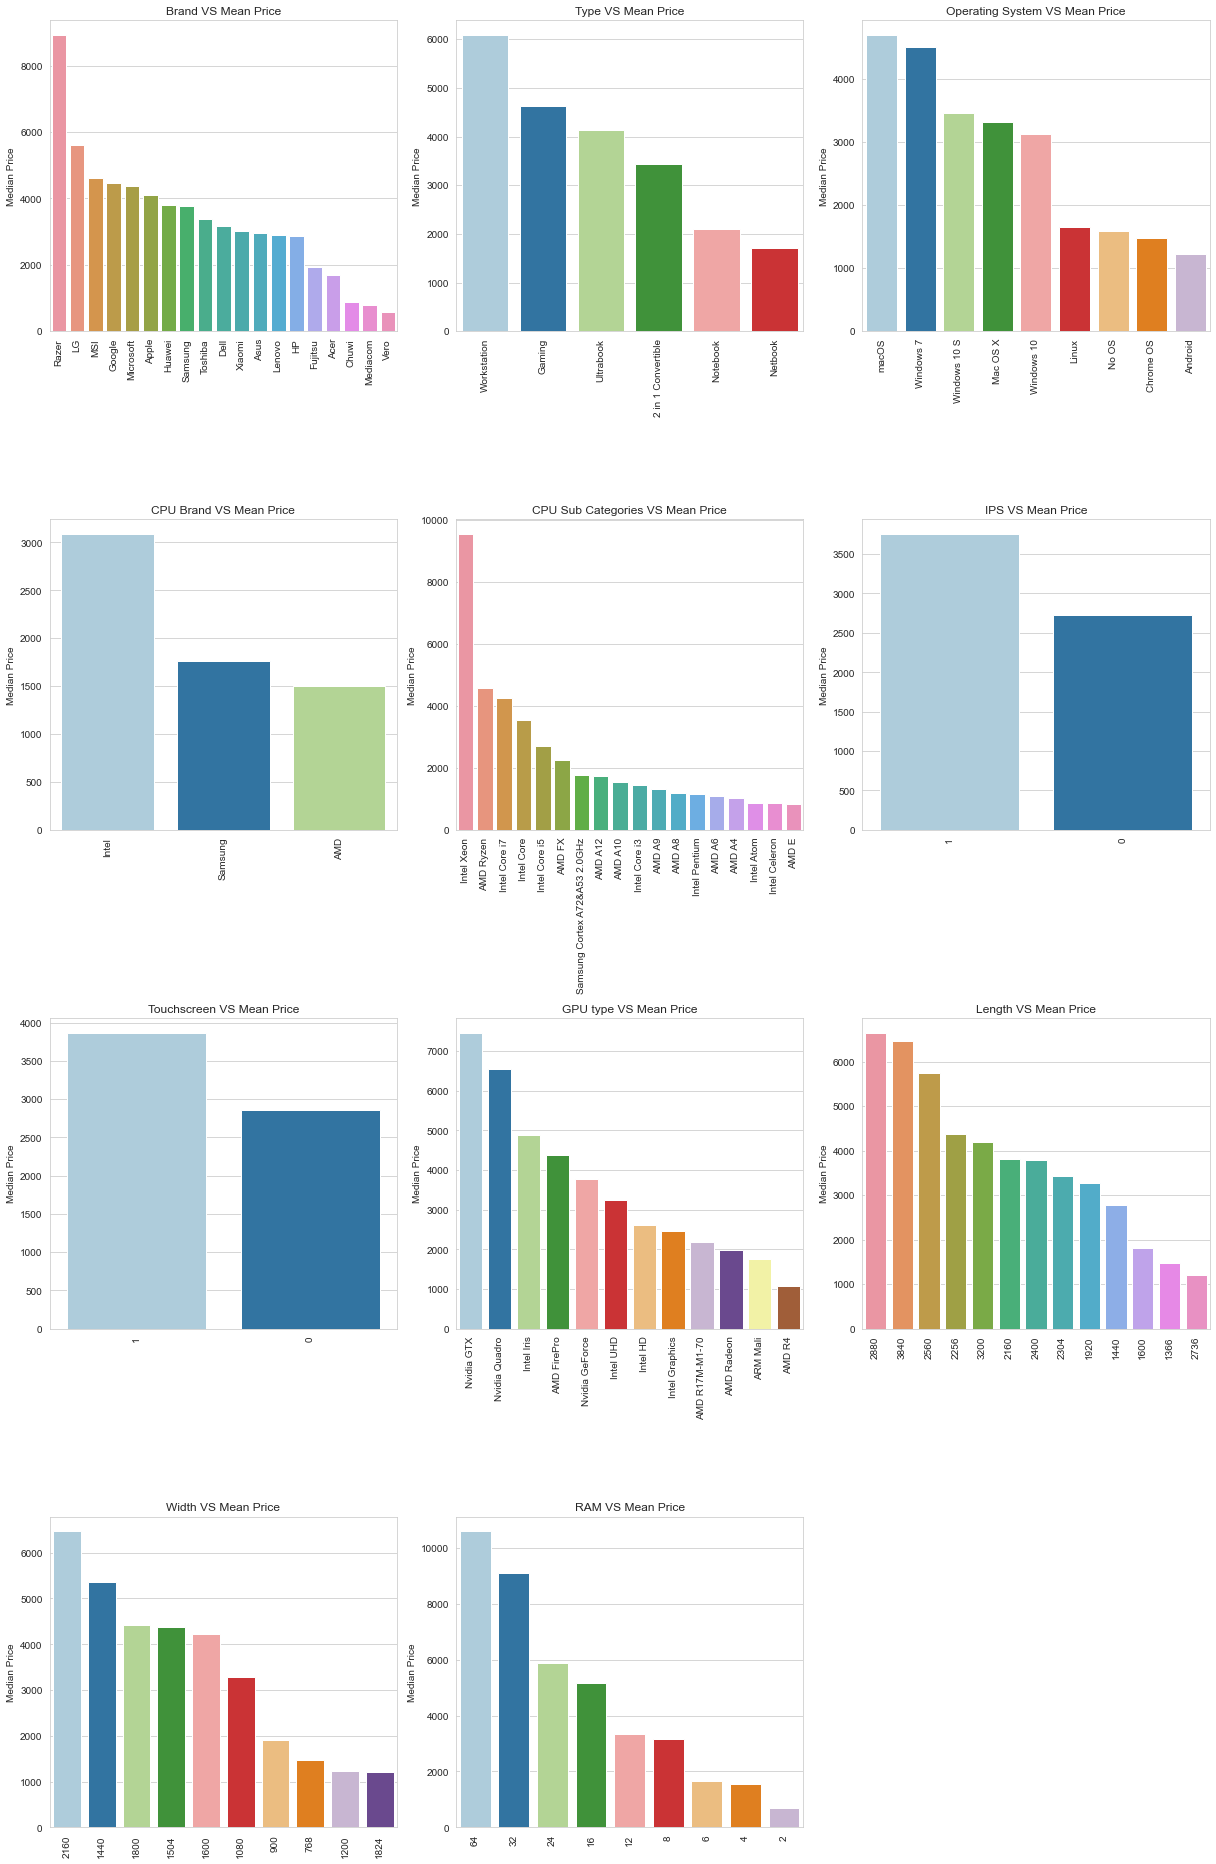

In [16]:
cat_col = ['Brand', 'Type', 'Operating System', 'CPU Brand','CPU Sub Categories', 'IPS' , 'Touchscreen'  ,'GPU type' ,'Length', 'Width' , 'RAM' ]
plt.figure(figsize=(17,26))

for i, col in enumerate(cat_col):

    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(4,3,i+1)
    ax.set_title(col + ' VS Mean Price')
    temp = data.groupby(col)['Price ($)'].mean().sort_values(ascending = False)
    
    sns.barplot(x=list(map(str, temp.index)) , y = temp , ax = ax)
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("Median Price")
plt.tight_layout()
plt.show()

### Brand
- Razor pc significantly more expensive than the rest as they sell gaming hardware with higher specs
- Chuwi ,Mediacom  , and Vero least expensive less well known in the market

### OS
- mac OS computers are the most expensive due to the 'Apple Tax'
- No OS computers are more expensive than Chrome OS /Android. Due to No OS computers have significantly more advanced hardware than Chromebooks and Android based PC

### CPU Brand
- Intel significantly more expensive than AMD and Samsung as Intel is the market leader

### CPU Subcategories 
- Xeon CPU is significantly more expensive as they typically have more cores
- Lower end models like Intel Atom and Celeron computers are less expensive

### Screen
- Screens with IPS and Touchscreen significantly more expensive as the panel more expensive to make





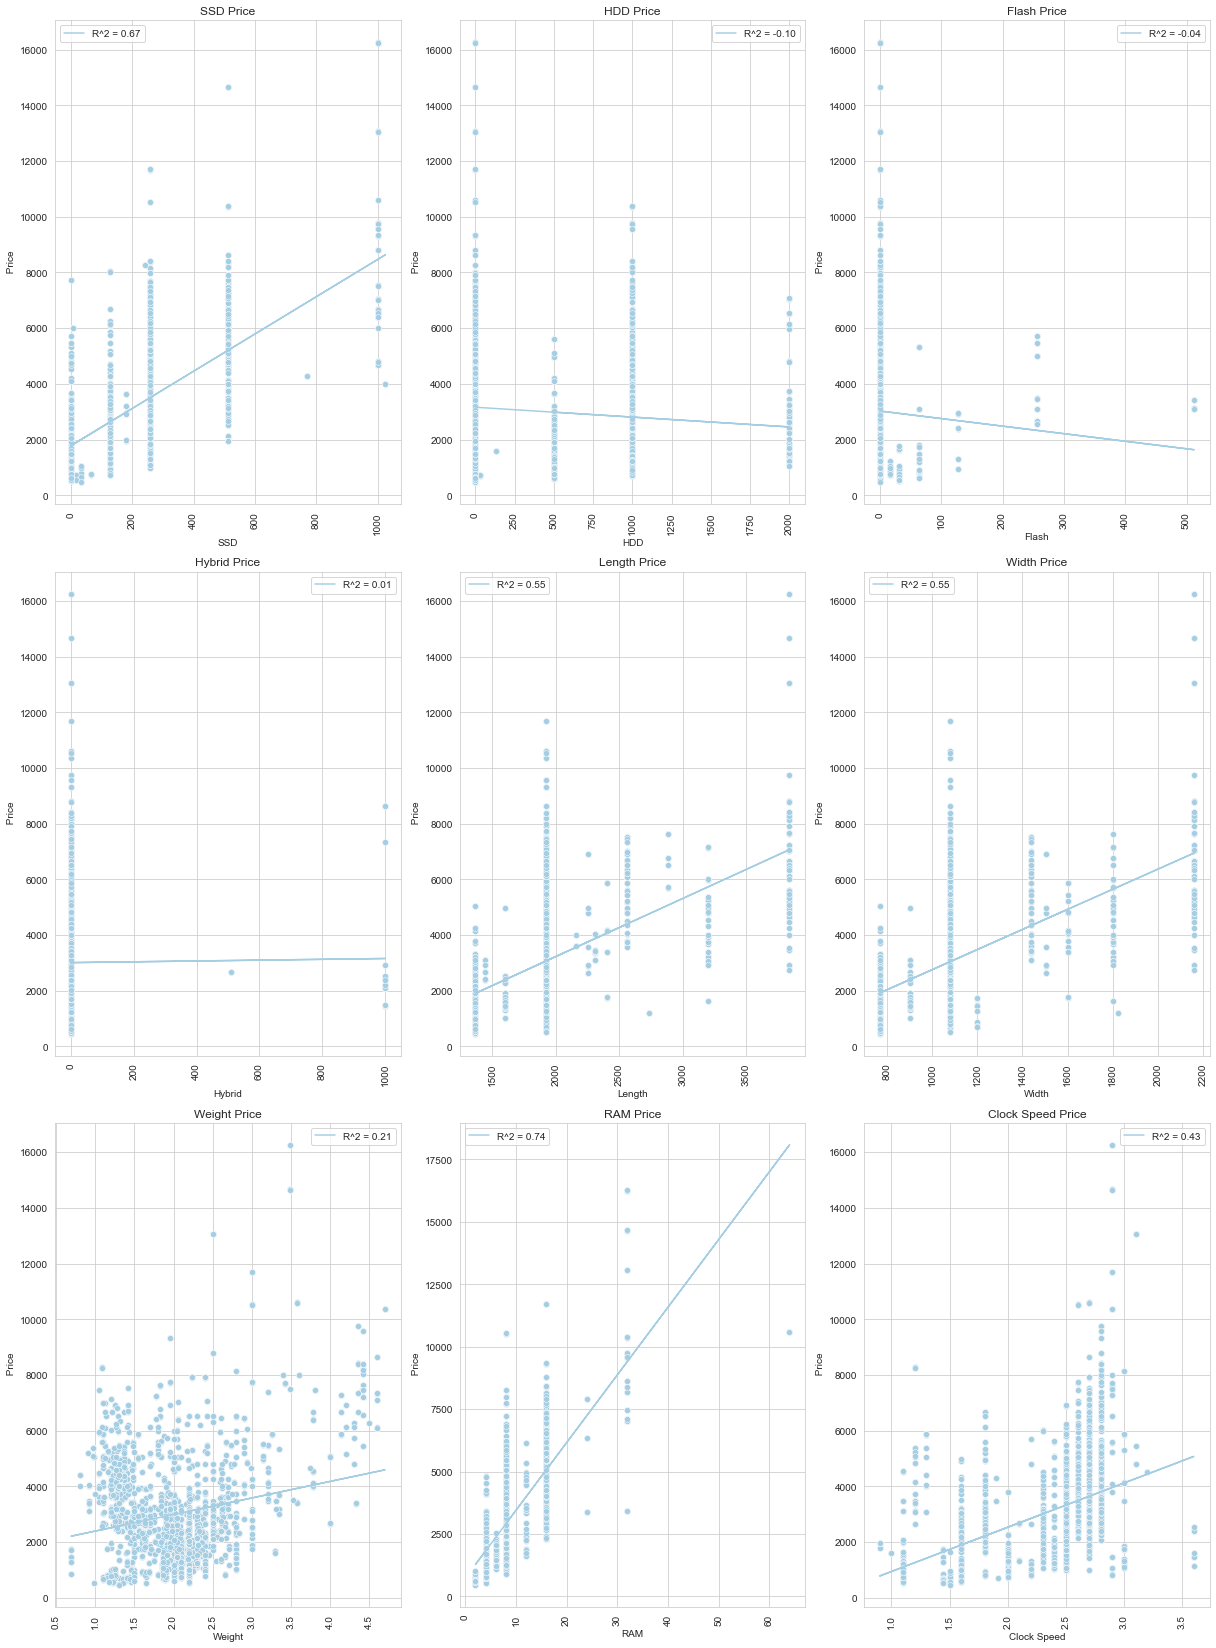

In [17]:
cat_col = ['SSD', 'HDD', 'Flash', 'Hybrid','Length', 'Width' , 'Weight'  ,'RAM'   , 'Clock Speed']
plt.figure(figsize=(17,23))

for i, col in enumerate(cat_col):

    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(3,3,i+1)
    ax.set_title(col + ' Price')
    #temp = data.groupby(col)['Price ($)'].mean().sort_values(ascending = False)
    m,c = np.polyfit(data[col],data['Price ($)'],1)
    x = data[col]
    y = data[col]*m + c 
    sns.scatterplot(x=col , y = 'Price ($)' , ax = ax , data = data )
    ax.plot(x ,y   , label = fr'R^2 = { data.corr().loc[col , "Price ($)"] :.2f}' )
    ax.legend() 
 #   sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel(" Price")
plt.tight_layout()
plt.show()

- Strongest relationship is between RAM and Price at r2 = 0.74
- Weakest is between hybrid (hard disk) and Price at r2 = 0.01, this is due to most computers having other storage types ( SSD , HDD)  and 0GB is assigned to the computers not using hybrid ,
- Oddly enough, there is a weak positive relationship between weight and price (expect lighter computers to be more expensive), most likely due to gaming computers with high specs  being more expensive
- 

#### How GPU Type affectes the prices 
- Within each GPU Type, 
- GPU Prices are

In [19]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               15320 non-null  object 
 1   Type                15320 non-null  object 
 2   Screen Size         15320 non-null  float64
 3   Screen Specs        15320 non-null  object 
 4   CPU                 15320 non-null  object 
 5   RAM                 15320 non-null  int32  
 6   GPU                 15320 non-null  object 
 7   Operating System    15320 non-null  object 
 8   Weight              15320 non-null  float64
 9   Price ($)           15320 non-null  float64
 10  SSD                 15320 non-null  int64  
 11  HDD                 15320 non-null  int64  
 12  Flash               15320 non-null  int64  
 13  Hybrid              15320 non-null  int64  
 14  CPU Brand           15320 non-null  object 
 15  CPU Sub Categories  15320 non-null  object 
 16  Cloc

# Modelling

#### Metric 

$$\mathrm{ Mean Squared Error} = \frac{\sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}}{N}$$

$$\mathrm{Mean Absolute Error } = \frac{\sum_{i=1}^{D}|x_i-y_i|}{N}$$
- MSE and MAE are 2 methods to find the average error made by the regressor per data point 
- Using squaring or absolute value, they make the residual positive, regardless of whether the predicted value of y is above or below the actual value of y 
- Squaring penalises large error as sqauring larger errors makes the error even larger 
- Hence, using MSE can prevent large errors
- However, MAE is easier to intepret as the numbers are smaller


$$\mathrm{Root Mean Squared Error} = \sqrt{Mean Squared Error}$$

$$\mathrm{Root Mean Squared Error} = \sqrt{\frac{\sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}}{N}}$$
- Square root of MSE is used as final metric (which is RMSE) as it penalise large error and easier to intepret (as numbers are smaller after square root) 

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.model_selection import train_test_split
rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)
categorical_columns = ['Brand', 'Type'  , 'GPU' , "Operating System" , 'CPU Brand'  , 'CPU Sub Categories']
numerical_columns = ['Screen Size', 'Weight'  , 'Clock Speed' , 'RAM' , 'Length' , 'Width','SSD'  , 'HDD'  , 'Flash' , 'Hybrid'   ]
column_trans_noscale = make_column_transformer(
    ( OneHotEncoder(sparse = False  , handle_unknown = 'ignore') ,categorical_columns ),
    remainder = 'passthrough',
    sparse_threshold=0 
    )
column_trans_scale = make_column_transformer(
    ( OneHotEncoder(sparse = False  , handle_unknown = 'ignore') ,categorical_columns ),
    (RobustScaler() ,numerical_columns),
    
    remainder = 'passthrough',
    sparse_threshold=0 
    )

temp = data.drop(columns = [ 'Screen Specs' , 'CPU'  , 'GPU type'] ).copy() 
X =temp.drop(columns = ['Price ($)' ])
y =temp['Price ($)']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2    , random_state = rng)


In [21]:

def plot_learning_curve(
    X,
    y,
    estimator  = None,

    ax=None,
    ylim=None,
    steps = None,
    bottom = None 
):

    if steps is not None and estimator is None :
        ax.set_title(steps[-1][0])

        estimator = Pipeline(steps)
    else:
        ax.set_title(estimator.__class__.__name__.replace('Regressor' , ''))

    if ax is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    if ylim is not None:
        axes[0].set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("RMSE")

    train_sizes, train_scores, test_scores= learning_curve(
        estimator,
        X,
        y,
        cv=5,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 20),
        scoring = rmse
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
    if bottom is  None :
        bottom =  min( [ np.min( train_scores_mean) , np.min(train_scores_mean - train_scores_std) ,np.min( test_scores_mean) , np.min(test_scores_mean - test_scores_std)  ])
    
    ax.set_ylim(top = 0   , bottom =  bottom)
    labelx = (np.min(train_sizes) + np.max(train_sizes ))/2
    labely = bottom/2
    ax.grid()

    ax.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    ax.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    ax.annotate(f"Final Train RMSE: {train_scores_mean[-1]:.2f} \n Final Cross Validation RMSE: {test_scores_mean[-1]:.2f}" , (labelx,labely), c = "white" , ha = 'center',va ='center' , bbox = dict(fc = "black", alpha = 0.7, boxstyle = "Round, pad=0.45") )

    return plt

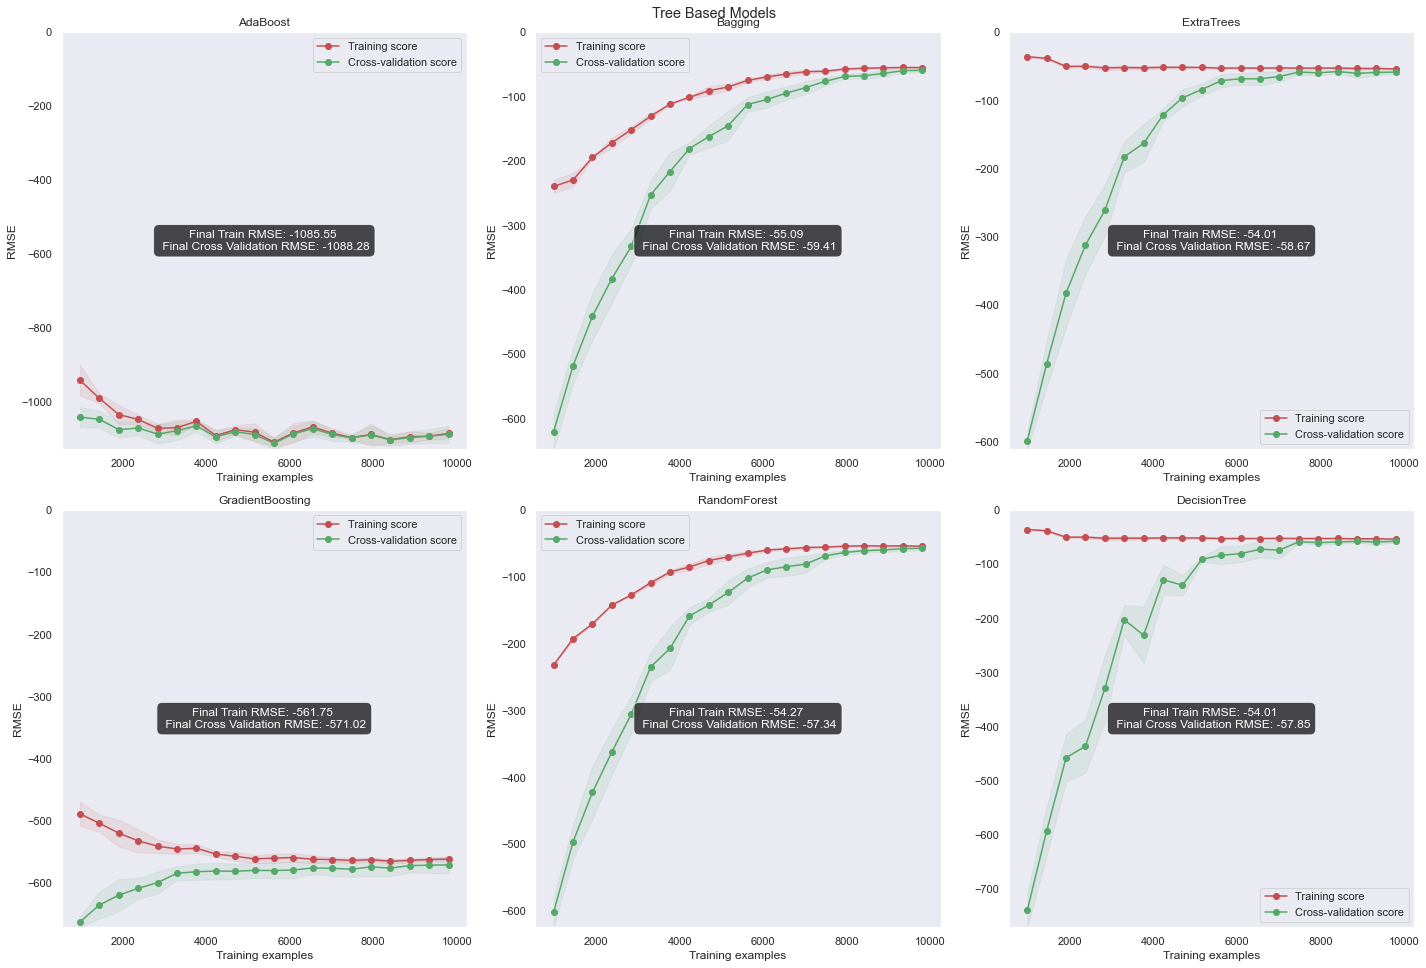

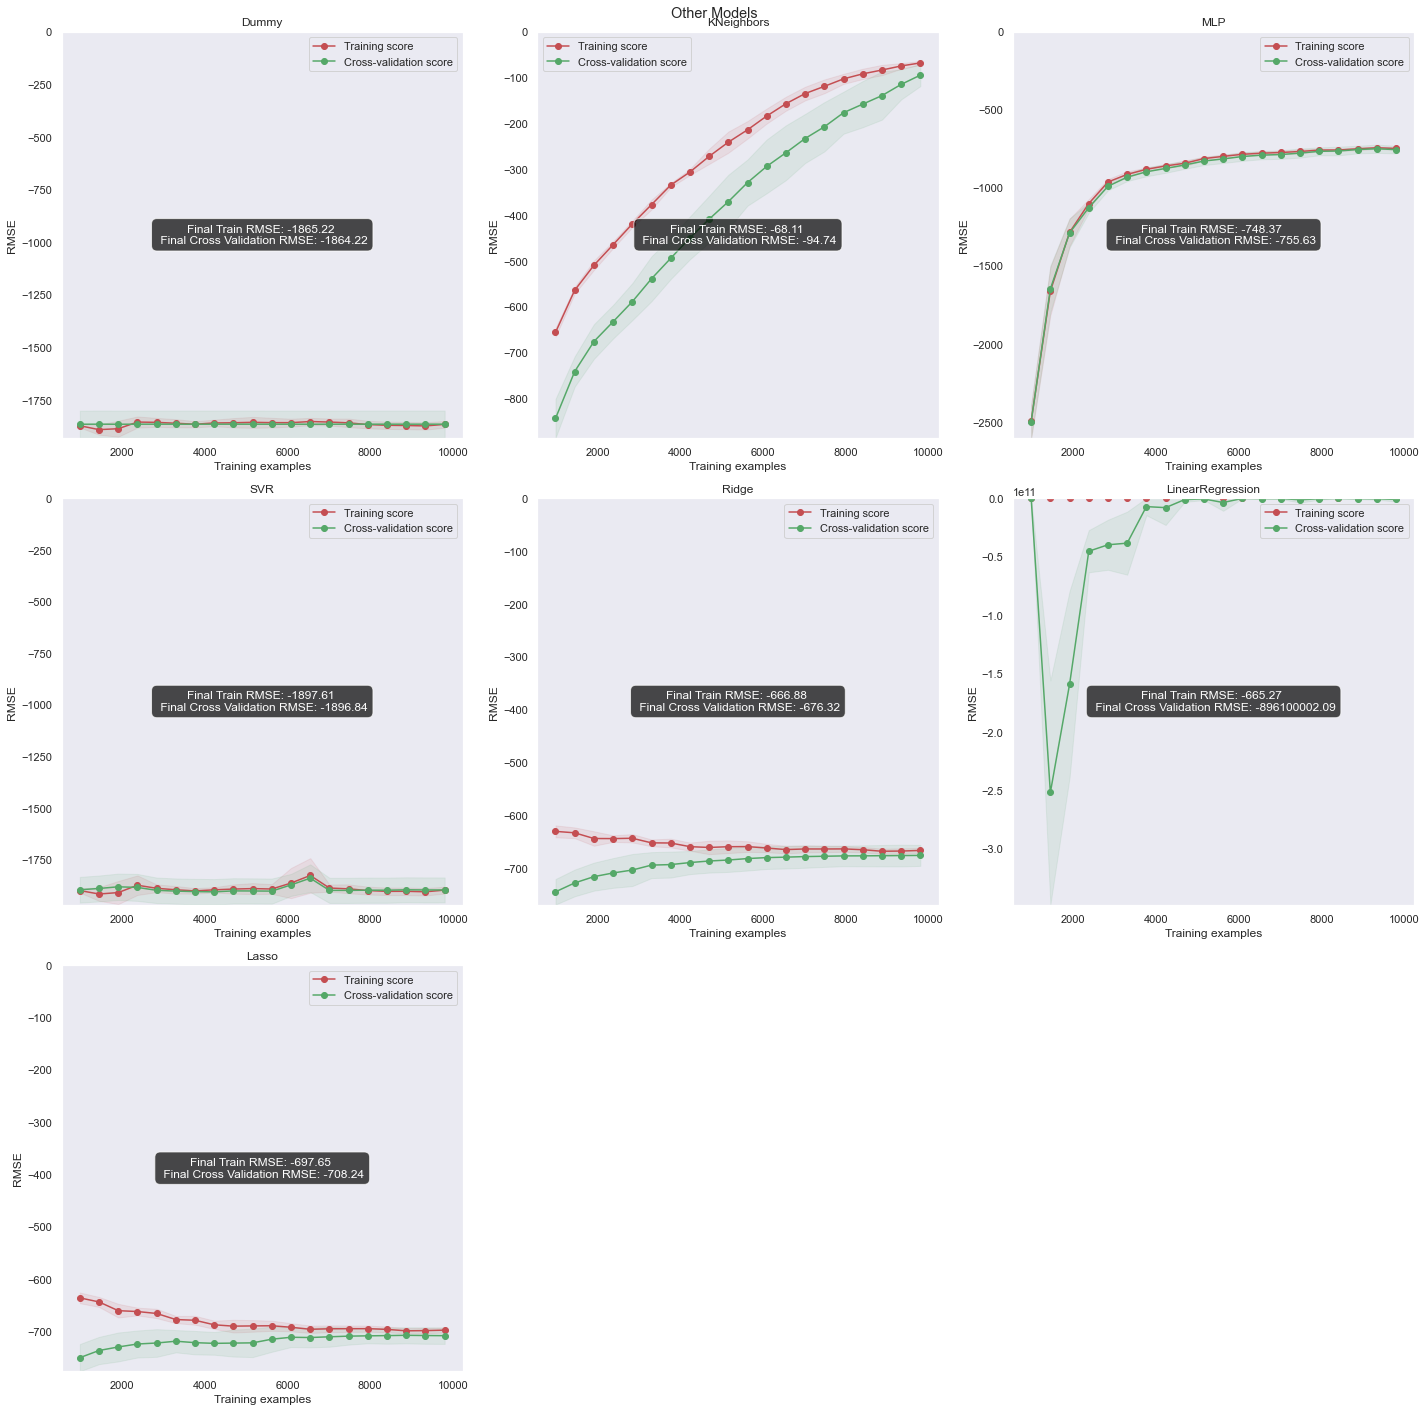

In [22]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import fbeta_score , make_scorer
from sklearn import linear_model as lin 
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import RobustScaler , FunctionTransformer 
import seaborn as sns 
from sklearn.tree import DecisionTreeRegressor
sns.set() 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import * 
from sklearn.base import BaseEstimator,TransformerMixin


        
plt.figure(figsize = (20,20))

plt.gcf().suptitle('Tree Based Models')
treebasedmodels = [AdaBoostRegressor(random_state = rng),BaggingRegressor(random_state = rng) , ExtraTreesRegressor(random_state = rng) ,GradientBoostingRegressor(random_state = rng) ,RandomForestRegressor(random_state = rng)  , DecisionTreeRegressor()  ]
for i , m in enumerate(treebasedmodels):
    plot_learning_curve(X = X_train, y = y_train , ax = plt.subplot(3,3, i+1) ,steps = [('cleaning' , column_trans_noscale ) , (m.__class__.__name__.replace('Regressor' , '') , m)])
    

plt.tight_layout()
plt.show() 
plt.figure(figsize = (20,20))

plt.gcf().suptitle('Other Models')

distancedbasedmodels = [DummyRegressor() , KNeighborsRegressor() ,MLPRegressor() ,  SVR() ,  lin.Ridge() , lin.LinearRegression()  , lin.Lasso()  ]
for i , m in enumerate(distancedbasedmodels):
    plot_learning_curve( X = X_train, y = y_train , ax = plt.subplot(3,3, i+1) , steps  = [('cleaning' , column_trans_scale ) , (m.__class__.__name__.replace('Regressor' , '') , m)])

plt.tight_layout()
plt.show() 

## Choosing a model
### Severely Underfitting Models
They are models that have both poor cross validation and train scores
1. `AdaBoost`
2. `Gradient Boosting`
3. `DummyClassifier`
4. `Ridge`
5. `Linear`
> Linear Regression has large random deviations
6. `SVR`
<br> 

`DummyRegressor` Predicts based on the mean of the dataset, as the distribution of price is non gaussian, but  right skwed, it leads to large errors and a large RMSE


`LinearRegression` , `Lasso`  , `Ridge` and `SVR`  underfitting,as they are unable to capture the non linear relationship between the features and price


`Neural Network` moderately underfits , as we do not have enough datapoints for it to perform well

`Kneighbours Regressor` actually performs quite well (expected as different computers with similar specifications have similar prices) , but slightly overfiting 

`Bagging` , `ExtraTrees` , `RandomForest` ,`DecisionTree` perform similarly with both low Test RMSE and Train RMSE 

`Decision Tree` is chosen as it trains only one tree (simpler) unlike `Bagging` , `ExtraTrees` , and `RandomForest`




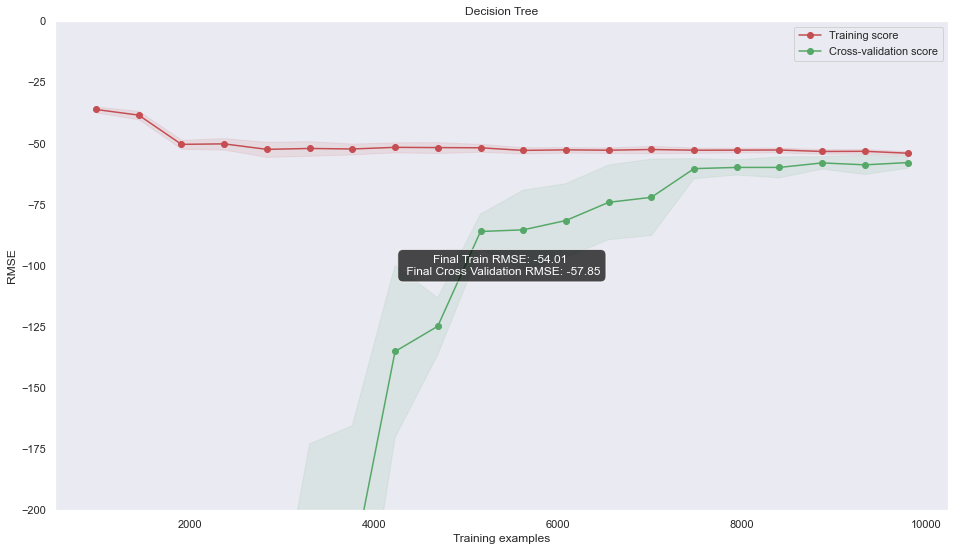

In [23]:
#learning curve for decision tree plotted again to verify something 
plt.figure( figsize = (16,9))
plot_learning_curve(X = X_train, y = y_train , ax = plt.gca() ,steps = [('cleaning' , column_trans_noscale ) , ('Decision Tree' , DecisionTreeRegressor() )] , bottom = -200 )
plt.show() 

#  Error Analysis
- To analyse the errors

- The Distribution of prices are highly skewed to the right 
- Log Transform makes the distribution more normally distributed which might make it easier for the model to predict the model

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor
def confirmer(pipe1, pipe2 , y_train, x_train ):
    s1 = np.mean(cross_val_score(pipe1, x_train, y_train , scoring = rmse))
    print('s1' , s1)
    s2 = np.mean(cross_val_score(pipe2, x_train, y_train , scoring = rmse))
    print('s2' , s2)
    return 100* (s2-s1)/s1

In [27]:
from sklearn.pipeline import Pipeline

pipeWithLogTransform = Pipeline([
('preprocess', column_trans_noscale),
('Model', TransformedTargetRegressor(DecisionTreeRegressor(random_state=rng), func=np.log,inverse_func=np.exp) )
])

pipeWithoutLogTransform =   Pipeline([
('preprocess', column_trans_noscale),
('Model' , DecisionTreeRegressor(random_state=rng))
])

print(f'There is a {confirmer(pipeWithoutLogTransform ,pipeWithLogTransform , y_train ,X_train ):.2f}% increase in scores')
# 

s1 -57.85514549836254
s2 -68.16714697519922
There is a 17.82% increase in scores


# Curse of High Dimensionality 


In [28]:
print(f"There are {len(column_trans_noscale.fit_transform(X_train).T) } Dimensions after one hot encoding. Which may lead to Curse of High Dimensionality ")

There are 177 Dimensions after one hot encoding. Which may lead to Curse of High Dimensionality 


![alt text](https://miro.medium.com/max/928/1*y09eem2__rqPydHNeDxwCg.png "Title")

- There is high dimensionality in the data after one hot encoding so many categorial features `['Brand', 'Type'  , 'GPU' , "Operating System" , 'CPU Brand'  , 'CPU Sub Categories']`
- According to huges rule, predictive power of model decreases if too many features are added to it 
- It can be solved using `PCA` or `RFE`
- `RFE` Removes the features based on their feature importance on the decision tree (least important features are removed)
- `PCA` creates new features which are linear combinations of old features while minimizes the amount of variance lost 


## RFE

RFE__n_features_to_select
PCA__n_components


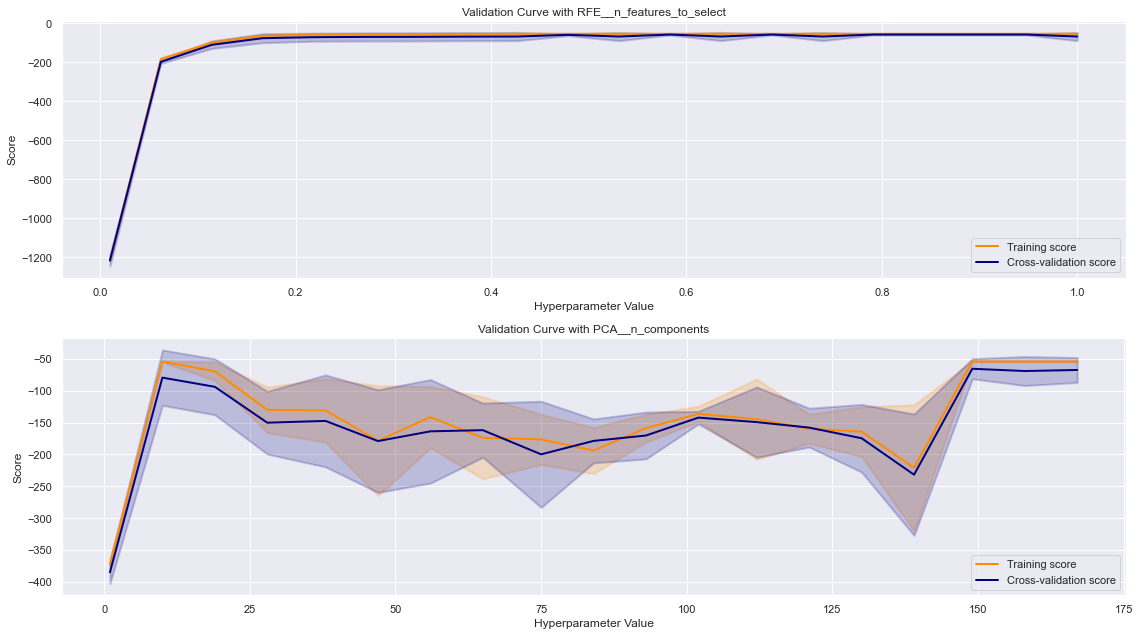

In [32]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import validation_curve , StratifiedKFold
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
model = Pipeline([
('preprocess', column_trans_noscale),
('RFE', RFE(DecisionTreeRegressor(random_state=rng))),
# ('Feature Selection', SelectFromModel(Lasso(random_state=rstate,alpha=.05))),
('Model', TransformedTargetRegressor(DecisionTreeRegressor(random_state=rng), func=np.log,inverse_func=np.exp) )
])
def custom_validation_curve(paramname, param_range  , ax , X_train, y_train  ,model): 
    #to plot  validation curve for each hyper parameter
    print(paramname) 
    train_scores, test_scores = validation_curve(
        model,
        X_train,
        y_train,
        param_name=paramname,
        param_range=param_range,
        scoring=rmse ,
        n_jobs=-1,
        cv = 5
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.set_title(f"Validation Curve with {paramname}")
    ax.set_xlabel('Hyperparameter Value')
    ax.set_ylabel("Score")
  #  ax.set_ylim(0.0, 1.1)
    lw = 2
    ax.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )
 
    ax.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
  
    ax.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
    )
    ax.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    
    ax.legend(loc="best")

plt.figure(figsize = (16,9)) 
from  multiprocessing import cpu_count
custom_validation_curve('RFE__n_features_to_select',np.linspace(0.01, 1 , 20 , dtype = float) , plt.subplot(211)  ,X_train, y_train ,model)

model_pca= Pipeline([
('preprocess', column_trans_noscale),
('PCA', PCA(random_state = rng ) ),
('Model', TransformedTargetRegressor(DecisionTreeRegressor(random_state=rng), func=np.log,inverse_func=np.exp) )
])

custom_validation_curve('PCA__n_components',np.linspace(1, 177  , 20 , dtype = int ) , plt.subplot(212)  ,X_train, y_train ,model_pca)

    

plt.tight_layout() 
plt.show() 



#### PCA 
- PCA has larger Standard Deviation (larger spread in scores between each fold of 5 fold cross validation ) in both train and test scores
- PCA also has no clear trend between `n_components` kept  and RMSE
- It is preferred as its results are less stable 

#### RFE
- Curve Plateau out at around 0.2 
- Most of the features are redundant as most of the graph is flat 
- By removing these features,  it is easier for the decision tree to split a node  (as it does not have to choose features from so many columns), which may lead to the decision tree to train faster 


RFE__n_features_to_select


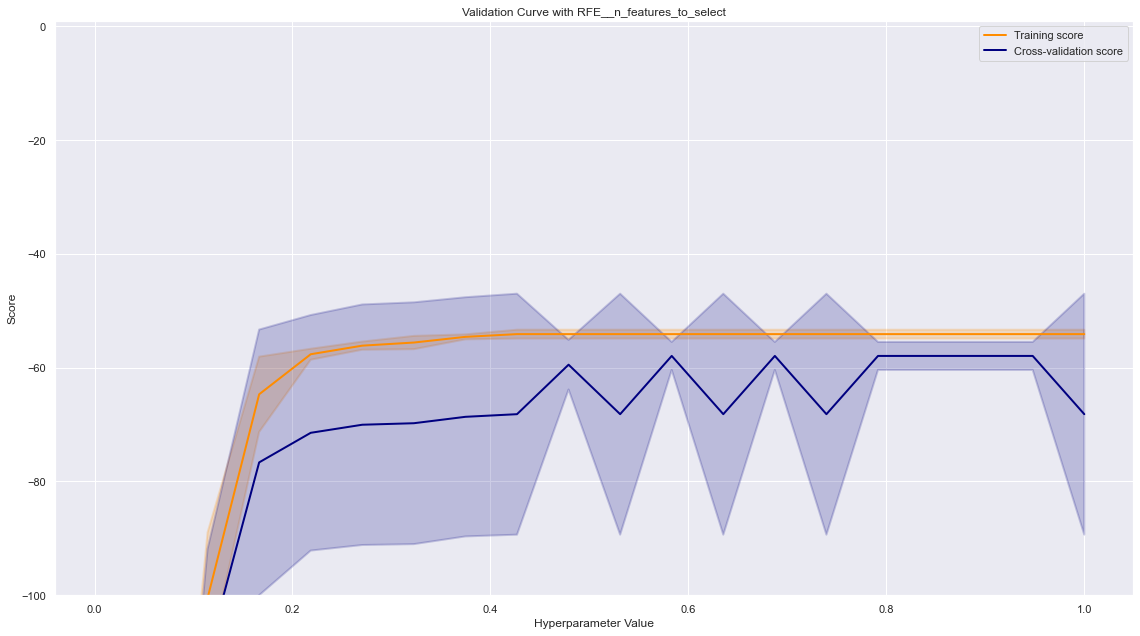

In [33]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import validation_curve , StratifiedKFold
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
model = Pipeline([
('preprocess', column_trans_noscale),
('RFE', RFE(DecisionTreeRegressor(random_state=rng))),
('Model', TransformedTargetRegressor(DecisionTreeRegressor(random_state=rng), func=np.log,inverse_func=np.exp) )
])
def custom_validation_curve(paramname, param_range  , ax , X_train, y_train  ,model): 
    #to plot  validation curve for each hyper parameter
    print(paramname) 
    train_scores, test_scores = validation_curve(
        model,
        X_train,
        y_train,
        param_name=paramname,
        param_range=param_range,
        scoring=rmse ,
        n_jobs=-1,
        cv = 5
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.set_title(f"Validation Curve with {paramname}")
    ax.set_xlabel('Hyperparameter Value')
    ax.set_ylabel("Score")
    ax.set_ylim(bottom  = -100)
    lw = 2
    ax.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )
 
    ax.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
  
    ax.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
    )
    ax.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    
    ax.legend(loc="best")

plt.figure(figsize = (16,9)) 
from  multiprocessing import cpu_count
grid = {'RFE__n_features_to_select' : np.linspace(0.01, 1 , 20 , dtype = float) }
for i, (pname,prange)  in enumerate(grid.items()):
    custom_validation_curve(pname,prange, plt.gca()  ,X_train, y_train ,model )
plt.tight_layout() 
plt.show() 



- Graph looks to plateau out completely at 0.4, Hence, 40% of the features are kept

Model__regressor__max_depth
Model__regressor__min_samples_split
Model__regressor__max_features
Model__regressor__min_samples_leaf


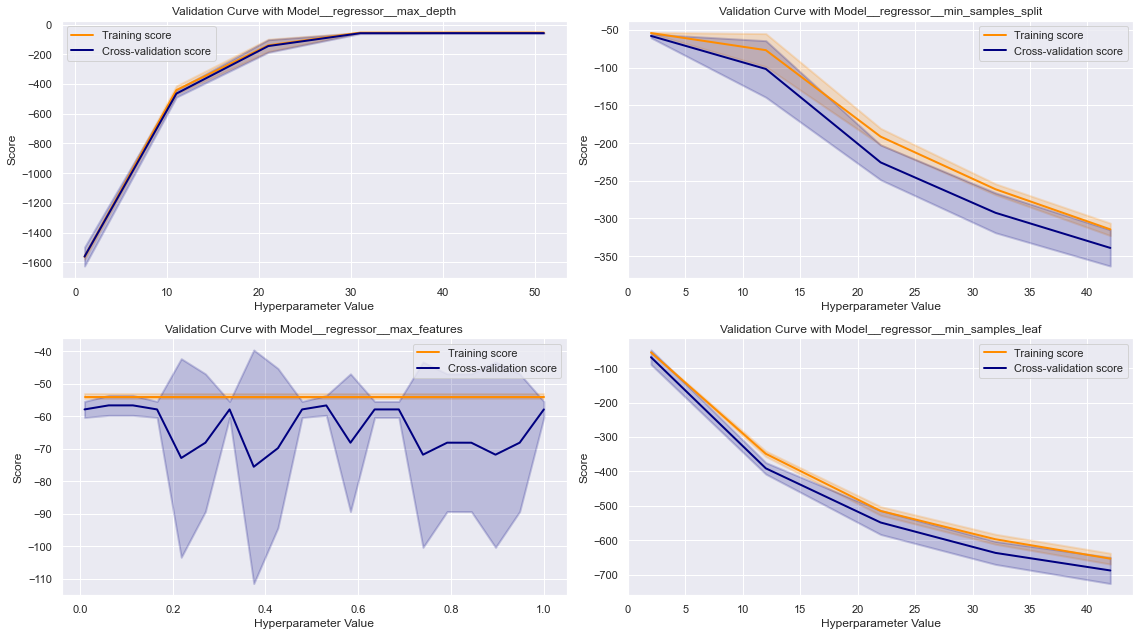

In [57]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import validation_curve , StratifiedKFold
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor 

pipe = Pipeline([
('preprocess', column_trans_noscale),
('RFE', RFE(DecisionTreeRegressor(random_state=rng) )),
('Model', TransformedTargetRegressor(DecisionTreeRegressor(random_state=rng), func=np.log,inverse_func=np.exp) )
])
def custom_validation_curve(paramname, param_range  , ax , X_train, y_train  ,model): 
    #to plot  validation curve for each hyper parameter
    print(paramname) 
    train_scores, test_scores = validation_curve(
        model,
        X_train,
        y_train,
        param_name=paramname,
        param_range=param_range,
        scoring=rmse ,
        n_jobs=-1,
        cv = 5
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.set_title(f"Validation Curve with {paramname}")
    ax.set_xlabel('Hyperparameter Value')
    ax.set_ylabel("Score")
   # ax.set_ylim(bottom  = -100)
    lw = 2
    ax.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
    )
 
    ax.fill_between(
        param_range,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
  
    ax.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
    )
    ax.fill_between(
        param_range,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    
    ax.legend(loc="best")

plt.figure(figsize = (16,9)) 

grid = {
        'Model__regressor__max_depth' : np.arange(1,52,10 , dtype = int ), 
        'Model__regressor__min_samples_split' : np.arange(2,52,10 , dtype = int)  ,
        'Model__regressor__max_features' : np.linspace(0.01 , 1 , 20) ,
        'Model__regressor__min_samples_leaf' : np.arange(2,51,10)
}
for i, (pname,prange)  in enumerate(grid.items()):
    custom_validation_curve(pname,prange, plt.subplot(2,2, i+1)  ,X_train, y_train ,pipe )
plt.tight_layout() 
plt.show() 



### Summary of Validation Curves
- Validation Curves monitor how the model performance changes with different hyperparameter values 
- Allow us to know the approximate ranges to test for `GridSearchCV`
- Max Depth prevents the tree from growing too big which causes overfitting
- min sample split is the minimum amount of samples required at a tree node to split it (larger values make model more regularised)
- min sample leaf is the minium amount of samples for node to considered leave (larger values make model more regularised)
Hyperparameter | Description | Range to search 
:-------------------|:---------------|:---------------
Max_depth |Predictive performance plateaus above 30  |Test values above 30  
min_samples_split | Predictive power decreases gently before 10 , decreases more drastically above 10  | Values between 0 and 10 tested
max_features  |Standard Deviation of CV Score is less (more consistent) less than 0.2. Standard Deviation more consistent above 0.2 | values below 0.2 
min_sample_leaf | predictive performance decreases below as value increases | test values above 0.2



In [45]:
from sklearn.base import clone 
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
('preprocess', column_trans_noscale),
('RFE', RFE(DecisionTreeRegressor(random_state=rng) ,n_features_to_select = 0.4 )),
('Model', TransformedTargetRegressor(DecisionTreeRegressor(random_state=rng), func=np.log,inverse_func=np.exp) )
])
paramgrid = {
        'Model__regressor__max_depth' : np.arange(30,50,5 , dtype = int ), 
        'Model__regressor__min_samples_split' :[2,6,10]  ,
        'Model__regressor__min_samples_leaf' :[2,6,10] ,
        'Model__regressor__max_features': np.linspace(0.01 , 0.2 , 5)
}
tuning = GridSearchCV( pipe ,paramgrid, n_jobs = -1 , scoring =rmse , cv = 5 , verbose = 3  )

tuning.fit(X_train , y_train )
print('best params' , tuning.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
best params {'Model__regressor__max_depth': 30, 'Model__regressor__max_features': 0.2, 'Model__regressor__min_samples_leaf': 2, 'Model__regressor__min_samples_split': 2}


# Final Model Evaluation

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , mean_absolute_percentage_error
pipe = Pipeline([
('preprocess', column_trans_noscale),
('RFE', RFE(DecisionTreeRegressor(random_state=rng) ,n_features_to_select = 0.4 )),
('Model', TransformedTargetRegressor(DecisionTreeRegressor(random_state=rng), func=np.log,inverse_func=np.exp) )
])
pipe.set_params(**{'RFE__n_features_to_select' : 0.4})
pipe.set_params(**tuning.best_params_)
pipe.fit(X_train,y_train)
prediction = pipe.predict(X_test)
print('mae' , mean_absolute_error(y_test,prediction))
print('rmse' ,pow( mean_squared_error(y_test,prediction) , 0.5))

print('mse' , mean_squared_error(y_test, prediction))
print('mape' , mean_absolute_percentage_error(y_test, prediction))


mae 15.593884528125097
rmse 60.090811229641155
mse 3610.9055942363675
mape 0.005813654897406351


- We have predicted a model that achieves a final rmse of 50  and mae of 15
- Suspect that there are  some large errors predicted on the test set due to the difference between the rmse and mae

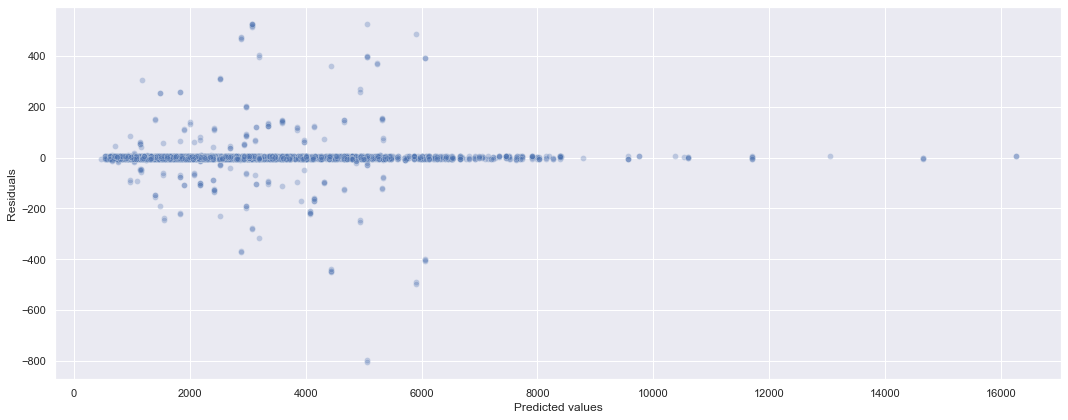

In [59]:

plt.subplots(figsize=(15, 6), tight_layout=True)
residuals = y_test-prediction
sns.scatterplot(x = prediction,y =residuals,alpha=0.3)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

- There are some large errors made by the regressor despite the low mean average percentage error
- Investigate further

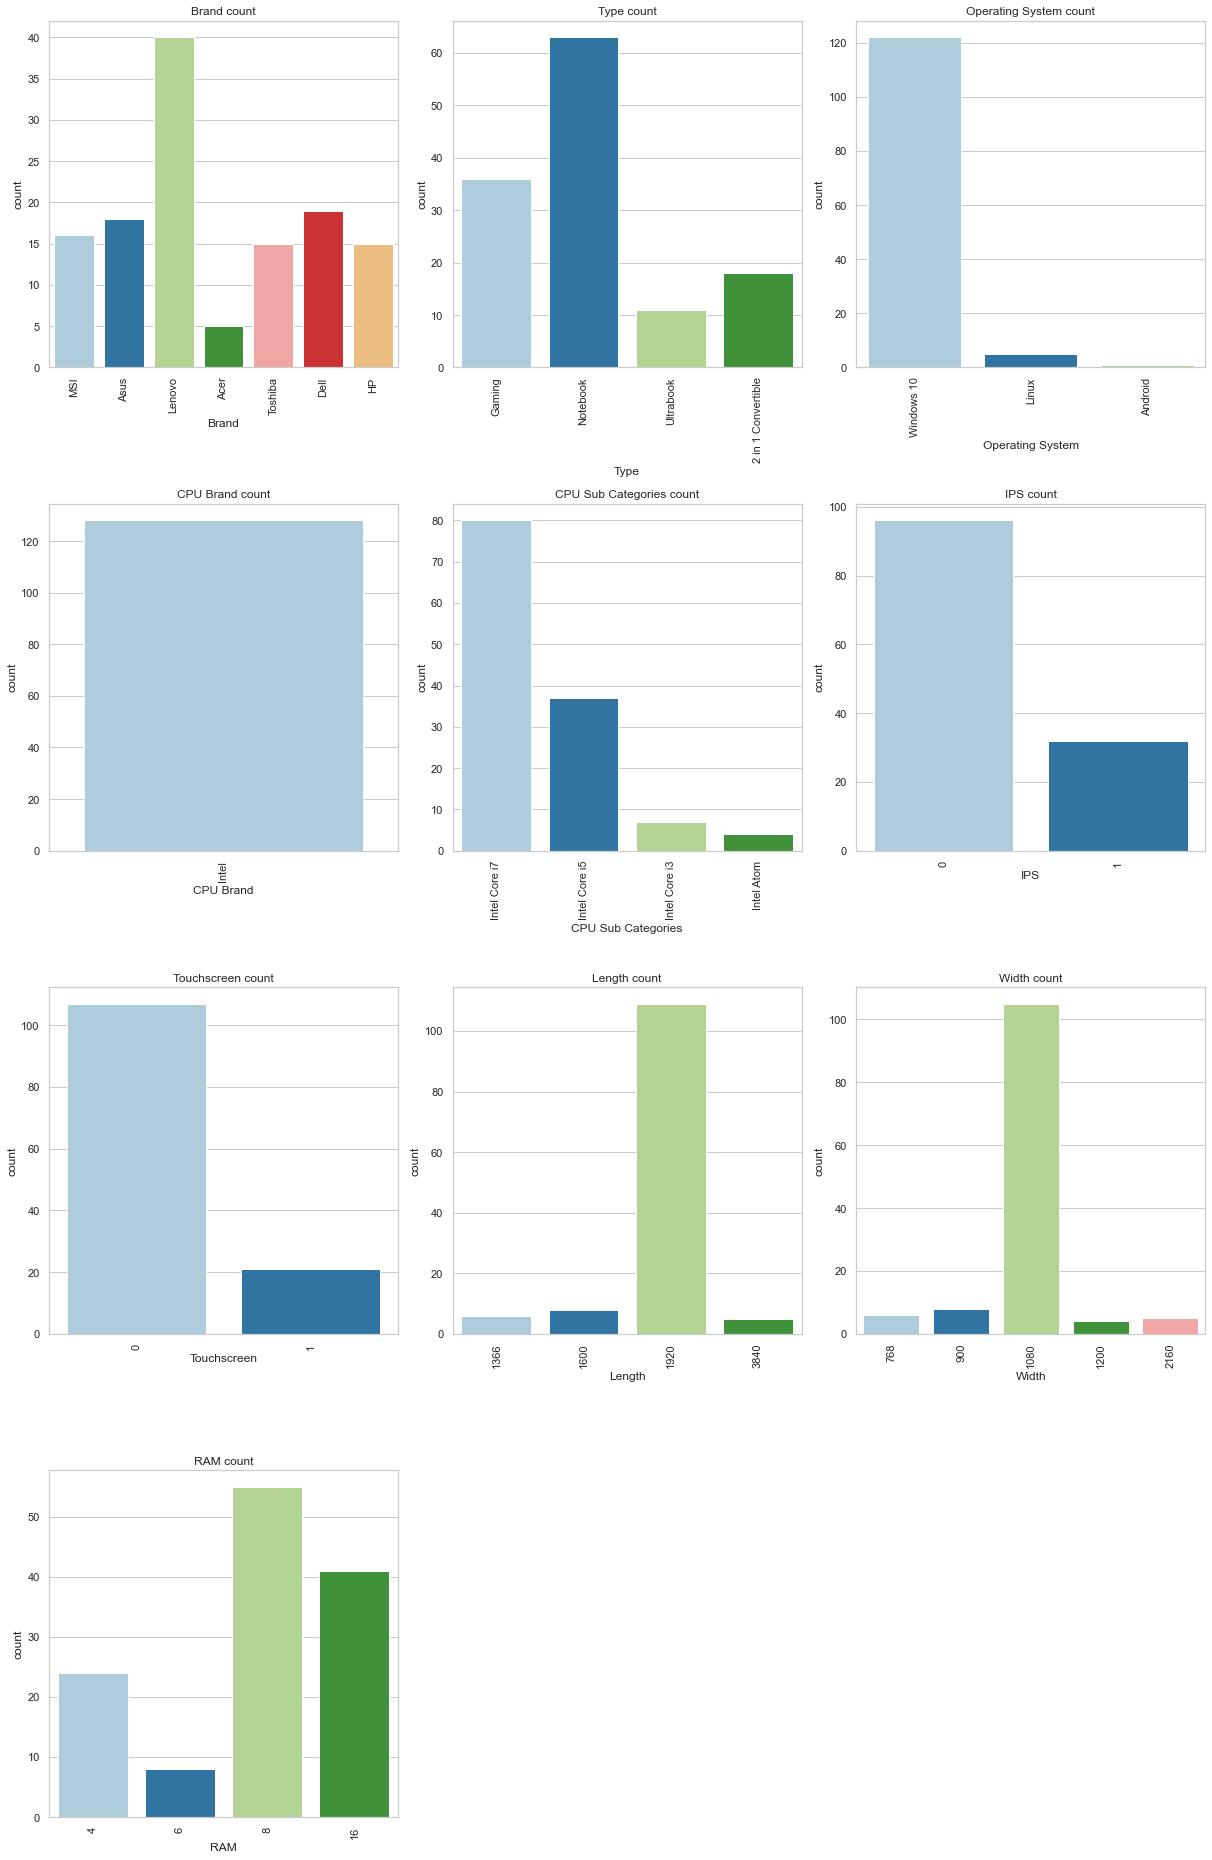

In [61]:
analysis = X_test.copy()
analysis['y'] = y_test 
analysis['yhat'] = prediction
analysis['error'] = residuals 
largeerr = analysis[(analysis.error > 100 ) |(analysis.error <- 100 ) ]
cat_col = ['Brand', 'Type', 'Operating System', 'CPU Brand','CPU Sub Categories', 'IPS' , 'Touchscreen'  ,'Length', 'Width' , 'RAM' ]
plt.figure(figsize=(17,26))

for i, col in enumerate(cat_col):

    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(4,3,i+1)
    ax.set_title(col + ' count')
    
    sns.countplot(x= col, data = largeerr )
    sns.set_style('whitegrid')
    plt.xticks(rotation=90)
    plt.ylabel("count")
plt.tight_layout()
plt.show()


- The datapoints with large errors are filtered out and the `countplot` is plotted for the variables
- Lenovo has espescially higher count compared to other brands for those  computers with large residuals
- For the rest of the features the countplot looks rougly the same as the countplot on the whole dataset
- Thus showing that Lenovo price their computers differently from the other brands

C:\Users\yee88\AppData\Local\Temp\ipykernel_97732\1007633027.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


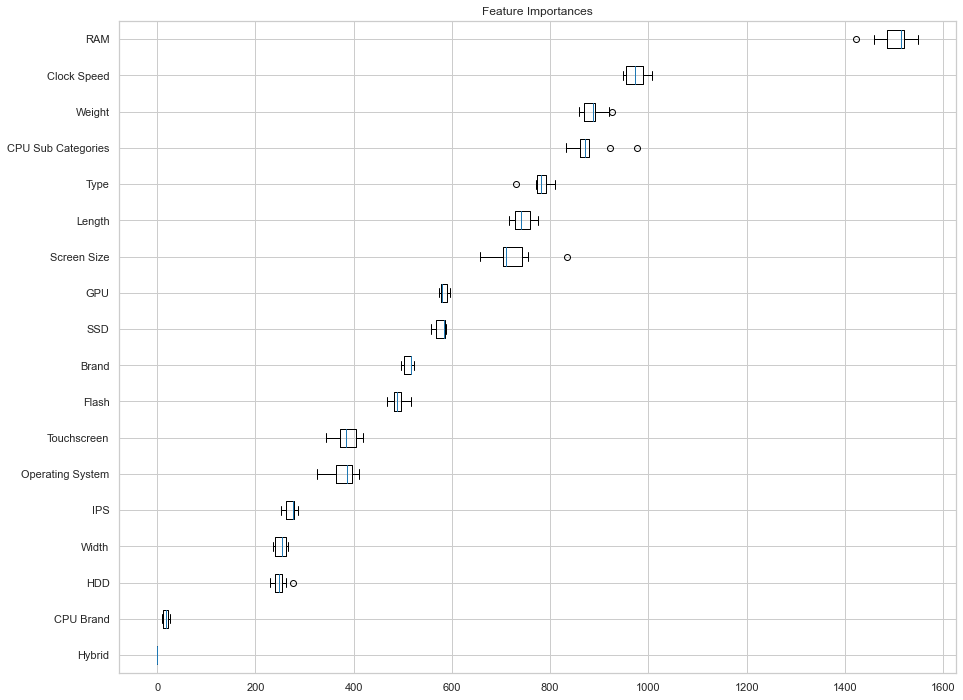

In [62]:
from sklearn.inspection import permutation_importance


fig, ax = plt.subplots(figsize=(15, 12)) 
impo = permutation_importance(pipe, X_test, y_test, n_repeats = 10,scoring=rmse, random_state =rng)
ax.boxplot(pd.DataFrame(impo.importances[impo.importances_mean.argsort()].T), labels=X_test.columns[impo.importances_mean.argsort()],vert=False)
plt.title("Feature Importances")
fig.show()


- Ram is significantly more important than the rest of the features
- Most of the features that are important impact the user experience the most (RAM   and clock speed affects computer speed  ) , (weight affects portability) , (screen size , affects the viewing experience )
- Clock speed has weak correlation with price, but is the second most important feature, showing that the relationship between clock speed and price is nonlinear


# Conclusion
- We have successfully created a model that predicts pc prices accurately generally ,as the mean abosolute percentage error is 0.005%. 
- However, there are some large errors being made by the model which might be due to a lack of information such as the year the computer is released.
